<a href="https://colab.research.google.com/github/ThyTran1402/Learn-AI-Foundation/blob/main/AI_Guild_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

In [ ]:
!pip install gymnasium -q
!pip install wheel setuptools pip --upgrade
!pip install swig
!pip install "gymnasium[box2d]"

In [ ]:
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image, display

## What is Reinforcement Learning?


<table style="width: 100%; border: none;">
  <tr>
    <td style="text-align: center; vertical-align: middle;">
      <img src="https://encrypted-tbn1.gstatic.com/shopping?q=tbn:ANd9GcTZUYOz-rdCi2ov1sCaPVErM88zH4QbiOYcdvY6szy38dw6mutTvMEnGn9l-dLFITCs6_UhEuBpavAivG0LmIdkWCFRqQcGnhKXEnkt0VI" width="400" alt="Image"/>
    </td>
    <td style="vertical-align: top; text-align: left; padding-left: 20px;">
      <pre style="font-family: monospace; font-size: 14px; white-space: pre-wrap;">
@book{SuttonBarto2018,
  title     = {Reinforcement Learning: An Introduction},
  author    = {Sutton, Richard S. and Barto, Andrew G.},
  edition   = {2nd},
  year      = {2018},
  publisher = {MIT Press},
  url       = {http://incompleteideas.net/book/the-book.html}
}
      </pre>
    </td>
  </tr>
</table>


### Table of Concents

0.   Markov Decision Processes
1.   Agent, Environment, State, Actions, Rewards

     1.1. Exploration vs Exploitation?

2.   Discount Factors
3.   Farama Foundation Gymnasium

     3.1. Continuous vs Discrete (Action/State) Spaces

     ↪ Q-Learning
4.   Policies (π)

     4.1. Off-policy vs On-policy methods

5.   Replay Buffers
6.   Deep Neural Networks as q-value estimators
7.   Target Networks

     ↪ DQNs
8.   Actor-Critic Methods

     ↪ DDPG
9.   On-policy RL

     ↪ PPO

10. Resources: Multi-agent Reinforcement Learning, Inverse RL, etc



## Markov Decision Processes

<div align="center">
  <img src = "https://zd-brightspot.s3.us-east-1.amazonaws.com/wp-content/uploads/2022/12/20110356/MDP-model.png" alt="Image" width="700" height="300" />
</div>

### Environment: Farama / OpenAI Gym

In order to do R.L, you will iteratively have an agent taking an action baased an environment based on some observation. Luckily, there's a library called [gymnasium](https://github.com/Farama-Foundation/Gymnasium) originally made by OpenAi (then continued by the non-profit Farama) that allows this.

<div align="center">
  <img src = "https://www.actuia.com/storage/uploads/2021/07/Habitat.jpg" alt="Image" width="550" height="300" />
</div>

Habitat is an example of another Reinforcement-Learning simulator and above are two different versions - 1.0 and 2.0.

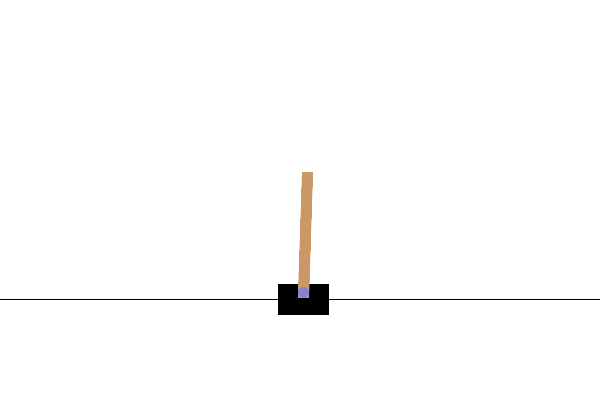

In [ ]:
def display_frames(frames, filename: str = "render.gif", fps: int = 24):
    imageio.mimsave(filename, frames, fps=fps)
    display(Image(filename=filename))

# `render_mode` needs to be rgb_array for headless runs (colab)
env = gym.make("CartPole-v1", render_mode="rgb_array")
obs, info = env.reset(seed=42)

frames = []

for _ in range(250):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)

    if terminated or truncated:
        obs, info = env.reset(seed=42)

env.close()
display_frames(frames)

# Q-Learning

Q-Learning is a simple R.L. technique which involves learning the best possible action given a certain state. This information is represented in the Q-table, where each row is the state the agent is in and each column is the possible action the agent can take.

<div align="center">
  <img src = "https://www.researchgate.net/publication/351884746/figure/fig1/AS:1067993664589824@1631640940747/Q-Learning-vs-Deep-Q-Learning.ppm" alt="Image" width="400" height="300" />
</div>

There's also Deep Q-Learning, but we'll go into more detail later in the notebook. To update the table, we use the algorithm below:

$$
\begin{aligned}
&\textbf{Algorithm: Q-Learning} \\
&\text{Initialize } Q(s,a) \text{ arbitrarily for all states } s \text{ and actions } a. \\[6pt]
&\textbf{For each episode:} \\
&\quad \text{Initialize state } s. \\
&\quad \textbf{While } s \text{ is non-terminal:} \\
&\quad \quad \text{Choose action } a \text{ from } s \text{ (e.g. } \epsilon\text{-greedy).} \\
&\quad \quad \text{Execute } a, \text{ observe reward } r \text{ and next state } s'. \\
&\quad \quad Q(s,a) \gets Q(s,a) + \alpha \Bigl[r + \gamma \max_{a'} Q(s',a') - Q(s,a)\Bigr]. \\
&\quad \quad s \gets s'. \\
\end{aligned}
$$


In [ ]:
import time
NUM_EPISODES = 10_000
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")
frames = []

# 16 states x 4 actions
Q = [[0] * env.action_space.n for _ in range(env.observation_space.n)]
gamma = 0.99
alpha = 0.2
epsilon = 1

for episode in range(NUM_EPISODES):
    obs, info = env.reset(seed=42)
    terminated = False
    truncated = False
    while not (terminated or truncated):

        if np.random.random() < epsilon:
            # Explore...
            action = env.action_space.sample()
        else:
            # Exploit...
            action = np.argmax(Q[obs])

        prev_obs = obs
        obs, reward, terminated, truncated, info = env.step(action)
        Q[prev_obs][action] += alpha * (reward + gamma * np.max(Q[obs]) - Q[prev_obs][action])

        if episode == NUM_EPISODES - 1:
            frame = env.render()
            frames.append(frame)

    print("left  up  down right")
    for row in Q:
        print(" ".join(f"{x:.2f}" for x in row))
    print("="*20)

    # Decaying epsilon; so slowly exploit more
    epsilon = max(0.01, epsilon * 0.995)

env.close()

Streaming output truncated to the last 5000 lines.
0.10 0.00 0.00 0.00
0.95 0.96 0.00 0.94
0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.92
0.00 0.00 0.00 0.00
0.96 0.00 0.97 0.95
0.96 0.98 0.98 0.00
0.97 0.99 0.00 0.90
0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00
0.00 0.19 0.99 0.00
0.98 0.99 1.00 0.98
0.00 0.00 0.00 0.00
left  up  down right
0.94 0.95 0.93 0.94
0.94 0.00 0.41 0.62
0.93 0.01 0.00 0.23
0.10 0.00 0.00 0.00
0.95 0.96 0.00 0.94
0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.92
0.00 0.00 0.00 0.00
0.96 0.00 0.97 0.95
0.96 0.98 0.98 0.00
0.97 0.99 0.00 0.90
0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00
0.00 0.19 0.99 0.00
0.98 0.99 1.00 0.98
0.00 0.00 0.00 0.00
left  up  down right
0.94 0.95 0.93 0.94
0.94 0.00 0.41 0.62
0.93 0.01 0.00 0.23
0.10 0.00 0.00 0.00
0.95 0.96 0.00 0.94
0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.92
0.00 0.00 0.00 0.00
0.96 0.00 0.97 0.95
0.96 0.98 0.98 0.00
0.97 0.99 0.00 0.90
0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00
0.00 0.19 0.99 0.00
0.98 0.99 1.00 0.98
0.00 0.00 0.00 0.00
left  u

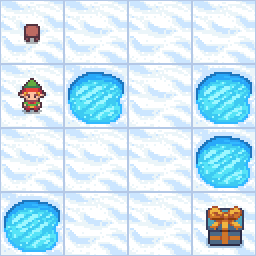

In [ ]:
display_frames(frames, fps = 10)

Now let's try this same learned approach on a slippery environment

In [ ]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True, render_mode="rgb_array")
frames = []

epsilon = 0.1

obs, info = env.reset(seed=42)
terminated = False
truncated = False
for episode in range(NUM_EPISODES):
    obs, info = env.reset(seed=42)
    terminated = False
    truncated = False
    while not (terminated or truncated):

        if np.random.random() < epsilon:
            # Explore...
            action = env.action_space.sample()
        else:
            # Exploit...
            action = np.argmax(Q[obs])

        prev_obs = obs
        obs, reward, terminated, truncated, info = env.step(action)
        Q[prev_obs][action] += alpha * (reward + gamma * np.max(Q[obs]) - Q[prev_obs][action])

    if episode == NUM_EPISODES - 1:
        frame = env.render()
        frames.append(frame)


env.close()

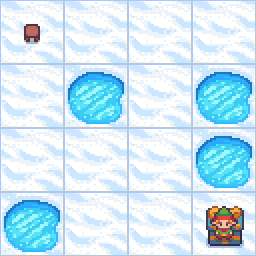

In [ ]:
display_frames(frames, fps = 10)

# Deep-Q Networks

As previously mentioned, Q-Learning is based on predicting the best action based on some state. We could use a table, as we did in the last example, but we could also use a deep-learning network.

Deep-learning is great at estimating functions, which is exactly what we'll try to do, estimating the function $Q(s, a)$ through $Q(s, a; θ)$.


<div align="center">
  <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20190613104538/Deep-Q-Learning.png" alt="Image" width="550" height="400" />
</div>

With this approach, we'll be able to solve much more complicated problems. As we could see even in our FrozenLake environment - once we increase the size to 8x8 and add slippery tiles, it becomes much harder to solve with Q-learning. Looking at RL for video games for example, traditional Q-learning becomes intractable:

Given a video game screen with:
* Dimensions 84x84 frames
* Let's say 4 consecutive frames (but this is much larger in practice)
* Gray scale, meaning 256 possible pixel values

Means $ 256^{84*84*4} $ rows in the Q-table! Instead, we use a neural network and predict the output of $ Q(s, a) $.

$$\begin{aligned}
&\textbf{Algorithm: DQN} \\
&\text{Initialize replay memory } D \\
&\text{Initialize a single Q-network with weights } \theta \\[6pt]
&\textbf{For each episode:} \\
&\quad \text{Initialize state } s \\
&\quad \textbf{For each step in the episode:} \\
&\quad \quad \text{With probability } \epsilon, \text{ select a random action } a \\
&\quad \quad \text{otherwise } a = \arg\max_{a} Q(s,a;\theta) \\
&\quad \quad \text{Execute } a, \text{ observe reward } r \text{ and next state } s' \\
&\quad \quad \text{Store } (s,a,r,s') \text{ in } D \\
&\quad \quad \text{Sample a minibatch of transitions } (s_i, a_i, r_i, s'_i) \text{ from } D \\
&\quad \quad y_i = r_i + \gamma \max_{a'} Q\bigl(s'_i, a'; \theta\bigr) \\
&\quad \quad \text{Update } \theta \text{ by minimizing } \Bigl(y_i - Q(s_i,a_i;\theta)\Bigr)^2 \text{ over all } i \in \text{minibatch} \\
&\quad \quad s \gets s' \\
\end{aligned}$$

In [ ]:
import flax.linen as nn
import optax
import flax
import wandb
import jax.numpy as jnp
from flax.training import train_state
import jax
from typing import List
from functools import partial

In [ ]:
class DeepQNetwork(nn.Module):
    input_dims: int
    fc_dims: List[int]
    n_actions: int
    lr: float

    def setup(self) -> None:
        self.fc1 = nn.Dense(self.fc_dims[0])
        self.fc2 = nn.Dense(self.fc_dims[1])
        self.fc3 = nn.Dense(self.n_actions)

    def __call__(self, inputs: jnp.ndarray) -> jnp.ndarray:
        x = nn.relu(self.fc1(inputs))
        x = nn.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class Agent:
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions,
             max_mem_size=100000, eps_end=0.01, eps_dec=5e-4, state=None):
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.input_dims = input_dims
        self.batch_size = batch_size
        self.n_actions = n_actions
        self.action_space = np.arange(n_actions)
        self.max_mem_size = max_mem_size
        self.mem_counter = 0
        self.eps_end = eps_end
        self.eps_dec = eps_dec

        if state is not None:
            self.state = state
        else:
            self.model = DeepQNetwork(input_dims=input_dims[0], fc_dims=[256, 256], n_actions=n_actions, lr=lr)
            self.rng = jax.random.PRNGKey(0)
            dummy_input = jnp.zeros((1, input_dims[0]))
            params = self.model.init(self.rng, dummy_input)['params']
            optimizer = optax.adam(lr)
            self.state = train_state.TrainState(
                step=0,
                apply_fn=self.model.apply,
                params=params,
                tx=optimizer,
                opt_state=optimizer.init(params)
            )

        self.state_memory = np.zeros((max_mem_size, *input_dims), dtype=np.float32)
        self.new_state_memory = np.zeros((max_mem_size, *input_dims), dtype=np.float32)
        self.action_memory = np.zeros(max_mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(max_mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(max_mem_size, dtype=np.float32)

    def store_transition(self, state, action, reward, new_state, done):
        index = self.mem_counter % self.max_mem_size  # circular buffer
        self.state_memory[index] = state
        self.new_state_memory[index] = new_state
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = 1.0 if done else 0.0
        self.mem_counter += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            obs = jnp.array(observation)[None, ...]
            q_values = self.state.apply_fn({'params': self.state.params}, obs)
            action = int(jnp.argmax(q_values, axis=1)[0])
        else:
            action = np.random.choice(self.action_space)
        return action

    @partial(jax.jit, static_argnums=(0,))
    def train_step(self, state, state_batch, action_batch, reward_batch, new_state_batch, terminal_batch):
        def loss_fn(params):
            # Compute Q-values for the current states
            q_values = self.model.apply({'params': params}, state_batch)
            # Gather Q-values for the selected actions along axis 1
            q_eval = jnp.take_along_axis(q_values, action_batch, axis=1).squeeze()
            # Compute Q-values for the next states
            next_q_values = self.model.apply({'params': params}, new_state_batch)
            next_q_max = jnp.max(next_q_values, axis=1)
            # Zero-out target Q-values for terminal states
            q_target = reward_batch + self.gamma * next_q_max * (1 - terminal_batch)
            loss = jnp.mean((q_target - q_eval) ** 2)
            return loss

        loss, grads = jax.value_and_grad(loss_fn)(state.params)
        state = state.apply_gradients(grads=grads)
        return state, loss

    def learn(self):
        if self.mem_counter < self.batch_size:
            return

        max_mem = min(self.mem_counter, self.max_mem_size)
        batch_indices = np.random.choice(max_mem, self.batch_size, replace=False)

        state_batch = jnp.array(self.state_memory[batch_indices])
        new_state_batch = jnp.array(self.new_state_memory[batch_indices])
        reward_batch = jnp.array(self.reward_memory[batch_indices])
        terminal_batch = jnp.array(self.terminal_memory[batch_indices])

        actions = jnp.array(self.action_memory[batch_indices]).reshape(-1, 1)

        self.state, loss = self.train_step(self.state, state_batch, actions,
                                             reward_batch, new_state_batch, terminal_batch)

        return loss

In [ ]:
wandb.init(
    project="LunarLander-DQN",
    config={
        "gamma": 0.99,
        "epsilon_start": 1.0,
        "lr": 0.003,
        "input_dims": [8],
        "n_actions": 4,
        "max_mem_size": 1000000,
        "batch_size": 64,
        "eps_end": 0.01,
        "eps_dec": 0.99,
        "n_games": 500
    }
)

config = wandb.config

env = gym.make("LunarLander-v3")
agent = Agent(gamma=config.gamma, epsilon=config.epsilon_start, lr=config.lr,
              input_dims=config.input_dims, n_actions=config.n_actions,
              max_mem_size=config.max_mem_size, batch_size=config.batch_size,
              eps_end=config.eps_end, eps_dec=config.eps_dec)

scores = []
loss_history = []
eps_history = []
n_games = config.n_games

for game in range(n_games):
    score = 0
    done = False
    episode_losses = []
    observation, info = env.reset(seed=42)
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, terminated, truncated, info = env.step(action)
        score += reward

        done = terminated or truncated

        agent.store_transition(observation, action, reward, observation_, done)
        loss = agent.learn()
        if loss is not None:
            episode_losses.append(loss)

        observation = observation_

    scores.append(score)
    eps_history.append(agent.epsilon)
    avg_score = np.mean(scores[-100:])
    avg_loss = np.mean(episode_losses) if episode_losses else 0
    loss_history.append(avg_loss)

    agent.epsilon = max(agent.epsilon * config.eps_dec, config.eps_end)

    wandb.log({
        "episode": game,
        "score": score,
        "avg_score_last_100": avg_score,
        "epsilon": agent.epsilon,
        "avg_loss": avg_loss
    })

    print(f'episode {game} score {score:.2f} average score {avg_score:.2f} epsilon {agent.epsilon:.2f} loss {avg_loss:.4f}')

env.close()
wandb.finish()

episode 0 score -226.19 average score -226.19 epsilon 0.99 loss 3.9635
episode 1 score -214.28 average score -220.24 epsilon 0.98 loss 13.5208
episode 2 score -303.45 average score -247.97 epsilon 0.97 loss 6.4311
episode 3 score -166.76 average score -227.67 epsilon 0.96 loss 5.2446
episode 4 score -210.05 average score -224.15 epsilon 0.95 loss 2.3501
episode 5 score -101.87 average score -203.77 epsilon 0.94 loss 1.7314
episode 6 score -141.98 average score -194.94 epsilon 0.93 loss 3.6945
episode 7 score -300.84 average score -208.18 epsilon 0.92 loss 1.4386
episode 8 score -211.22 average score -208.52 epsilon 0.91 loss 1.3854
episode 9 score -92.37 average score -196.90 epsilon 0.90 loss 1.1526
episode 10 score -414.32 average score -216.67 epsilon 0.90 loss 1.3970
episode 11 score -160.47 average score -211.98 epsilon 0.89 loss 3.1883
episode 12 score -77.29 average score -201.62 epsilon 0.88 loss 1.3731
episode 13 score -78.80 average score -192.85 epsilon 0.87 loss 1.3909
epis

avg_loss,▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▂▁▃▂▄▄▇▃▃▂▇▄▅▅▆▆█▇▇▇
avg_score_last_100,▁▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇█████
episode,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇█████
epsilon,███▇▇▆▆▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
score,▁▂▃▃▃▄▃▄▄▄▃▃▄▄▄▄▄▄▄▄▆▇█▄▇▅▄▃▁▆▇▅█▇▄▅▇▇▄▄
avg_loss,6.64112
avg_score_last_100,123.97982
episode,499
epsilon,0.01
score,218.2926


In [ ]:
import flax
data_to_save = {
    'agent_state': agent.state,
    'epsilon': agent.epsilon,
    'mem_counter': agent.mem_counter,
    'state_memory': agent.state_memory,
    'new_state_memory': agent.new_state_memory,
    'action_memory': agent.action_memory,
    'reward_memory': agent.reward_memory,
    'terminal_memory': agent.terminal_memory,
    'scores': scores,

}

serialized_data = flax.serialization.to_bytes(data_to_save)

with open('/content/trained_agent.pkl', 'wb') as f:
    f.write(serialized_data)

In [ ]:
import matplotlib.pyplot as plt

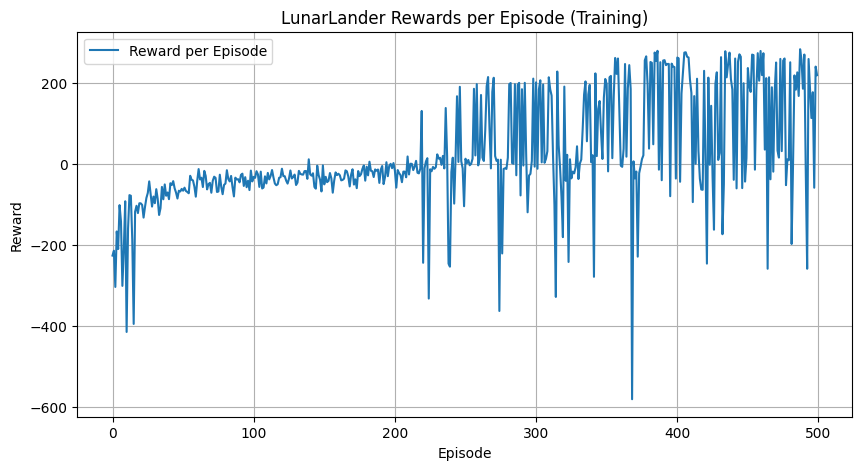

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(n_games), scores, label="Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("LunarLander Rewards per Episode (Training)")
plt.legend()
plt.grid(True)
plt.show()

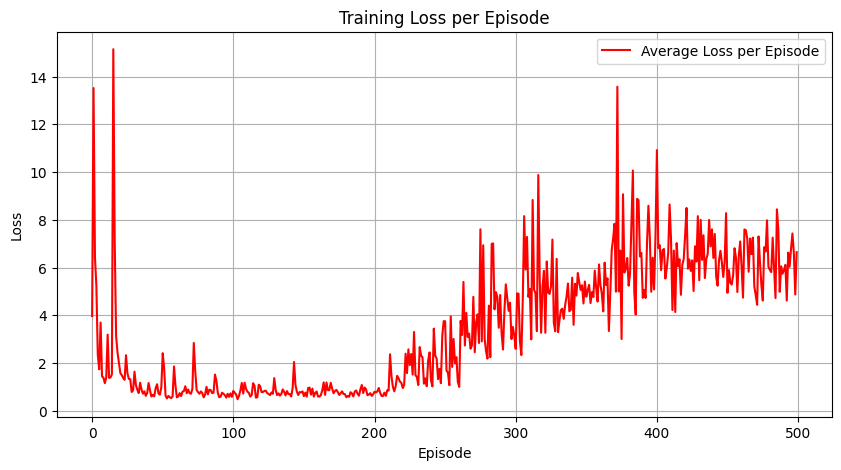

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(n_games), loss_history, label="Average Loss per Episode", color="red")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.title("Training Loss per Episode")
plt.legend()
plt.grid(True)
plt.show()

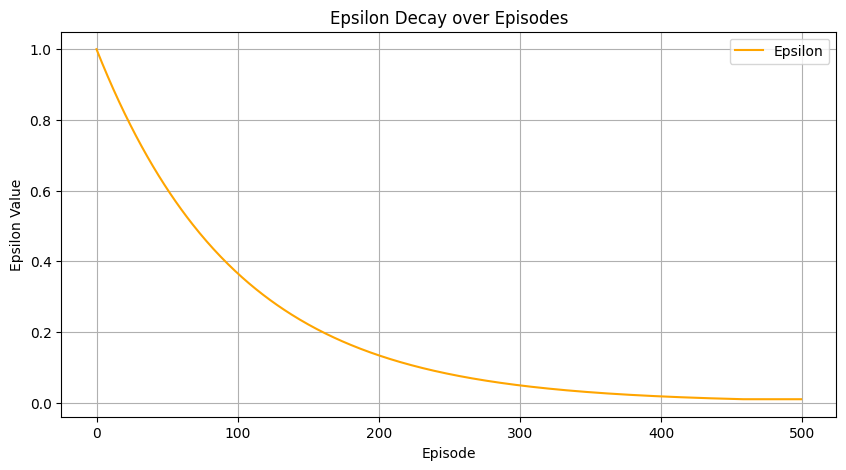

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(n_games), eps_history, label="Epsilon", color="orange")
plt.xlabel("Episode")
plt.ylabel("Epsilon Value")
plt.title("Epsilon Decay over Episodes")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")

with open('/content/trained_agent.pkl', 'rb') as f:
    serialized_data = f.read()

loaded_data = flax.serialization.from_bytes(data_to_save, serialized_data)

agent = Agent(gamma=0.99, epsilon=epsilon, lr=0.003, input_dims=[8],
                n_actions=4, max_mem_size=1000000, batch_size=64,
                eps_end=0.01, eps_dec=0.99, state=loaded_data['agent_state'])

frames = []
score = 0
done = False
observation, info = env.reset(seed=42)

while not done:
    frame = env.render()
    frames.append(frame)

    action = agent.choose_action(observation)
    observation_, reward, terminated, truncated, info = env.step(action)
    score += reward
    done = terminated or truncated
    observation = observation_

env.close()
print(f"Test Episode Score: {score:.2f}")

Test Episode Score: 188.52


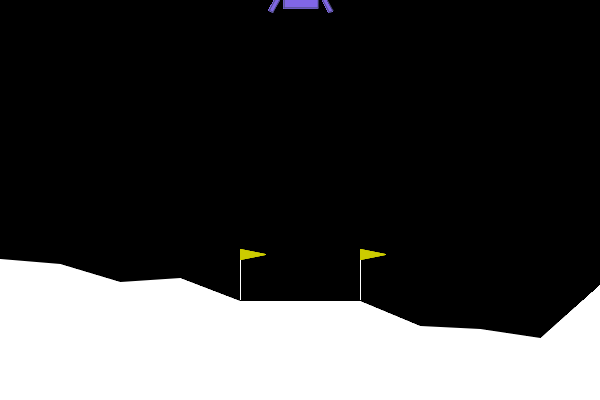

In [ ]:
display_frames(frames)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

save_path = '/content/drive/MyDrive/AI Guild/Models/dqn_ln.pkl'


Mounted at /content/drive


In [ ]:
with open(save_path, 'wb') as f:
    f.write(serialized_data)

print("Model saved to Google Drive at:", save_path)

Model saved to Google Drive at: /content/drive/MyDrive/AI Guild/Models/dqn_ln.pkl


## On-Policy vs Off-Policy

We can break down RL approaches in two: on-policy or off-policy. On-policy means you "train" a model that both interacts with the environment and predicts the best action. Off-policy seperates these two concerns, meaning one model interacts with the environment and another which predicts the action.

### Target Networks

Using what we learned above, we can improve on the DQN approach by introducing a target network - or splitting our network. Now, we have a network that predicts the next possible action and another that evaluates the chosen action.

One thing you might notice is the use of a "replay memory". It's a structure that stores all transitions made by our online network, which is used to train the offline network through randomly sampling from it. We need to randomply sample in order to prevent the model using the sequential information of the transitions in its learning.

After a certain number of steps, the Q-network (online policy) "transfers" its knowledge to the target Q-network (offline policy).

<div align="center">
  <img src = "https://images.theengineeringprojects.com/image/main/2024/01/what-is-a-double-deep-q-network-3.png" alt="Image" width="600" height="400" />
</div>


$$\begin{aligned}
&\textbf{Algorithm: Double DQN (DDQN)} \\
&\text{Initialize replay memory } D \\
&\text{Initialize Q-network (online) with weights } \theta \\
&\text{Initialize target network with weights } \theta^- \gets \theta \\[6pt]
&\textbf{For each episode:} \\
&\quad \text{Initialize state } s \\
&\quad \textbf{For each step in the episode:} \\
&\quad \quad \text{With probability } \epsilon, \text{ select a random action } a \\
&\quad \quad \text{otherwise } a = \arg\max_{a} Q(s,a;\theta) \quad(\text{using online network}) \\
&\quad \quad \text{Execute } a, \text{ observe reward } r \text{ and next state } s' \\
&\quad \quad \text{Store } (s,a,r,s') \text{ in } D \\
&\quad \quad \text{Sample a minibatch of transitions } (s_i, a_i, r_i, s'_i) \text{ from } D \\
&\quad \quad a^* = \arg\max_{a'}\,Q\bigl(s'_i,a';\theta\bigr)\quad(\text{best action from online network}) \\
&\quad \quad \text{Then evaluate this action with the target network:} \\
&\quad \quad y_i = r_i + \gamma \; Q\!\bigl(s'_i, a^*;\theta^-\bigr) \\
&\quad \quad \text{Update } \theta \text{ by minimizing } \Bigl(y_i - Q(s_i,a_i;\theta)\Bigr)^2 \text{ over all } i \\
&\quad \quad s \gets s' \\
&\quad \text{Every } C \text{ steps, update target network: } \theta^- \gets \theta \\
\end{aligned}$$

In [ ]:
class AgentTarget:
    def __init__(
        self,
        gamma,
        epsilon,
        lr,
        input_dims,
        batch_size,
        n_actions,
        max_mem_size=100000,
        eps_end=0.01,
        eps_dec=5e-4,
        replace_target_cnt=1000,
        state=None
    ):
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.input_dims = input_dims
        self.batch_size = batch_size
        self.n_actions = n_actions
        self.action_space = np.arange(n_actions)
        self.max_mem_size = max_mem_size
        self.mem_counter = 0
        self.eps_end = eps_end
        self.eps_dec = eps_dec
        self.replace_target_cnt = replace_target_cnt
        self.learn_step_counter = 0

        # If you already have a pre-trained state, reuse it:
        if state is not None:
            self.state = state
            self.target_state = state
        else:
            self.model = DeepQNetwork(
                input_dims=input_dims[0],
                fc_dims=[256, 256],
                n_actions=n_actions,
                lr=lr
            )
            self.rng = jax.random.PRNGKey(0)
            dummy_input = jnp.zeros((1, input_dims[0]))
            params = self.model.init(self.rng, dummy_input)["params"]
            optimizer = optax.chain(
                optax.clip_by_global_norm(10.0),
                optax.adamw(learning_rate=lr, weight_decay=1e-5)
            )

            self.state = train_state.TrainState(
                step=0,
                apply_fn=self.model.apply,
                params=params,
                tx=optimizer,
                opt_state=optimizer.init(params),
            )
            # Target network initialized with same parameters
            self.target_state = train_state.TrainState(
                step=0,
                apply_fn=self.model.apply,
                params=params,
                tx=optimizer,
                opt_state=optimizer.init(params),
            )

        # Replay memory
        self.state_memory    = np.zeros((max_mem_size, *input_dims), dtype=np.float32)
        self.new_state_memory= np.zeros((max_mem_size, *input_dims), dtype=np.float32)
        self.action_memory   = np.zeros(max_mem_size, dtype=np.int32)
        self.reward_memory   = np.zeros(max_mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(max_mem_size, dtype=np.float32)

    def store_transition(self, state, action, reward, new_state, done):
        index = self.mem_counter % self.max_mem_size
        self.state_memory[index]    = state
        self.new_state_memory[index]= new_state
        self.reward_memory[index]   = reward
        self.action_memory[index]   = action
        self.terminal_memory[index] = 1.0 if done else 0.0
        self.mem_counter += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            obs = jnp.array(observation)[None, ...]
            q_values = self.state.apply_fn({"params": self.state.params}, obs)
            action = int(jnp.argmax(q_values, axis=1)[0])
        else:
            action = np.random.choice(self.action_space)
        return action

    @partial(jax.jit, static_argnums=(0,))
    def train_step(self,
                   state,
                   target_params,
                   state_batch,
                   action_batch,
                   reward_batch,
                   new_state_batch,
                   terminal_batch):
        """
        Double DQN update:
          1. Use the *online network* (params) to select best actions in new_state_batch.
          2. Evaluate those actions with the *target network* (target_params).
        """
        def loss_fn(params):
            # Q(s,a; θ) from the online network
            q_values = self.model.apply({"params": params}, state_batch)
            q_eval   = jnp.take_along_axis(q_values, action_batch, axis=1).squeeze()

            # next_q_values from the *online* network to get best action
            next_q_values_online = self.model.apply({"params": params}, new_state_batch)
            best_actions = jnp.argmax(next_q_values_online, axis=1).reshape(-1,1)

            next_q_values_target = self.model.apply({"params": target_params}, new_state_batch)
            next_q_chosen = jnp.take_along_axis(next_q_values_target, best_actions, axis=1).squeeze()

            q_target = reward_batch + self.gamma * next_q_chosen * (1 - terminal_batch)

            loss = jnp.mean((q_target - q_eval) ** 2)
            return loss

        loss, grads = jax.value_and_grad(loss_fn)(state.params)
        new_state = state.apply_gradients(grads=grads)
        return new_state, loss

    def update_target_network(self):
        # Hard update: copy online network parameters to target network
        self.target_state = self.target_state.replace(params=self.state.params)

    def learn(self):
        if self.mem_counter < self.batch_size:
            return

        if self.learn_step_counter % self.replace_target_cnt == 0:
            self.update_target_network()

        max_mem = min(self.mem_counter, self.max_mem_size)
        batch_indices = np.random.choice(max_mem, self.batch_size, replace=False)

        state_batch     = jnp.array(self.state_memory[batch_indices])
        new_state_batch = jnp.array(self.new_state_memory[batch_indices])
        reward_batch    = jnp.array(self.reward_memory[batch_indices])
        terminal_batch  = jnp.array(self.terminal_memory[batch_indices])
        actions         = jnp.array(self.action_memory[batch_indices]).reshape(-1, 1)

        self.state, loss = self.train_step(
            self.state,
            self.target_state.params,
            state_batch,
            actions,
            reward_batch,
            new_state_batch,
            terminal_batch
        )

        self.learn_step_counter += 1
        return loss

In [ ]:
import wandb
wandb.init(
    project="LunarLander-DQN",
    config={
        "gamma": 0.99,
        "epsilon_start": 1.0,
        "lr": 1e-4,
        "input_dims": [8],
        "n_actions": 4,
        "max_mem_size": 1000000,
        "batch_size": 64,
        "eps_end": 0.1,
        "eps_dec": 0.99,
        "n_games": 500
    }
)

config = wandb.config
env = gym.make("LunarLander-v3")

agent = AgentTarget(
    gamma=config.gamma,
    epsilon=config.epsilon_start,
    lr=config.lr,
    input_dims=config.input_dims,
    n_actions=config.n_actions,
    max_mem_size=config.max_mem_size,
    batch_size=config.batch_size,
    eps_end=config.eps_end,
    eps_dec=config.eps_dec,
    replace_target_cnt=1000
)

scores, loss_history, eps_history = [], [], []
n_games = config.n_games

for game in range(n_games):
    score = 0
    done  = False
    episode_losses = []
    observation, info = env.reset(seed=42)

    while not done:
        action = agent.choose_action(observation)
        observation_, reward, terminated, truncated, info = env.step(action)
        score += reward
        done = terminated or truncated

        agent.store_transition(observation, action, reward, observation_, done)
        loss = agent.learn()
        if loss is not None:
            episode_losses.append(loss)
        observation = observation_

    scores.append(score)
    eps_history.append(agent.epsilon)
    avg_score = np.mean(scores[-100:])
    avg_loss  = np.mean(episode_losses) if episode_losses else 0
    loss_history.append(avg_loss)

    agent.epsilon = max(agent.epsilon * config.eps_dec, config.eps_end)

    wandb.log({
        "episode": game,
        "score": score,
        "avg_score_last_100": avg_score,
        "epsilon": agent.epsilon,
        "avg_loss": float(avg_loss)
    })

    print(f"episode {game} score {score:.2f} "
          f"average score {avg_score:.2f} "
          f"epsilon {agent.epsilon:.2f} loss {avg_loss:.4f}")

env.close()
wandb.finish()

# DDPG

$$
\begin{aligned}
&\textbf{Algorithm: Deep Deterministic Policy Gradient (DDPG)} \\
&\text{Initialize actor } \mu(s \mid \theta^\mu) \text{ and critic } Q(s,a \mid \theta^Q) \text{ with random weights.}\\
&\text{Initialize target networks: } \theta^{\mu'} \gets \theta^\mu,\; \theta^{Q'} \gets \theta^Q.\\
&\text{Initialize replay buffer } D. \\[6pt]
&\textbf{For each episode:}\\
&\quad \text{Initialize state } s. \\
&\quad \textbf{For each step:}\\
&\quad \quad a = \mu(s \mid \theta^\mu) + N \quad (\text{Ornstein–Uhlenbeck exploration noise}). \\
&\quad \quad \text{Execute } a, \text{ observe reward } r \text{ and next state } s'. \\
&\quad \quad \text{Store } (s,a,r,s') \text{ in } D. \\
&\quad \quad \text{Sample a minibatch from } D. \\
&\quad \quad y = r + \gamma Q\bigl(s', \mu'(s' \mid \theta^{\mu'}) \mid \theta^{Q'}\bigr). \\
&\quad \quad \text{Update critic by minimizing } \bigl(y - Q(s,a \mid \theta^Q)\bigr)^2. \\
&\quad \quad \text{Update actor using gradient:}\\
&\quad \quad \quad \nabla_{\theta^\mu} J \approx \frac{1}{N} \sum \nabla_a Q(s,a \mid \theta^Q)\big\vert_{a=\mu(s)} \nabla_{\theta^\mu}\mu(s \mid \theta^\mu). \\
&\quad \quad \text{Update target networks:}\\
&\quad \quad \quad \theta^{\mu'} \gets \tau \theta^\mu + (1-\tau)\theta^{\mu'},\\
&\quad \quad \quad \theta^{Q'} \gets \tau \theta^Q + (1-\tau)\theta^{Q'}.\\
&\quad \quad s \gets s'. \\
\end{aligned}
$$


### [See an Implementation](https://github.com/ghubnerr/darwin/blob/main/continuous-lunar-lander/ddpg.py)

![image](https://miro.medium.com/v2/resize:fit:927/0*s_qoUycs4VXOcj9E.png)

# Proximal Policy Optimization

### [See an Implementation](https://github.com/ghubnerr/darwin/blob/main/cartpole/ppo.py)

$$
\begin{aligned}
&\textbf{Algorithm: Proximal Policy Optimization (PPO)} \\
&\text{Initialize policy parameters } \theta \text{ and value parameters } \phi. \\[6pt]
&\textbf{For each iteration:} \\
&\quad \text{Run policy } \pi_\theta \text{ in the environment to collect trajectories.}\\
&\quad \text{Compute advantage estimates } \hat{A}_t \text{ using } V_\phi. \\
&\quad \theta_{\text{old}} \gets \theta. \\
&\quad \textbf{For each epoch:} \\
&\quad \quad L^{\text{CLIP}}(\theta) = \mathbb{E}_t \Bigl[ \min\bigl(r_t(\theta)\hat{A}_t,\; \text{clip}(r_t(\theta),1-\epsilon,1+\epsilon)\,\hat{A}_t \bigr)\Bigr], \\
&\quad \quad \text{where } r_t(\theta) = \frac{\pi_\theta(a_t \mid s_t)}{\pi_{\theta_{\text{old}}}(a_t \mid s_t)}.\\
&\quad \quad \text{Update } \theta \text{ by maximizing } L^{\text{CLIP}}(\theta).\\
&\quad \quad \text{Update value function by minimizing } (V_\phi(s_t) - R_t)^2.\\
\end{aligned}
$$
